In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns
from matplotlib import gridspec
%matplotlib inline

In [ ]:
print(os.getcwd())
os.chdir('C:\\Users\\Carrie Zhu\\Documents\\Research\\GWAS-frontera\\LDSC')
print(os.getcwd())

In [ ]:
df = pd.read_csv("height_posteriors.txt",sep="\t")

## Heritability Plot

#### Heritability by Sex

In [235]:
os.chdir('C:\\Users\\Carrie Zhu\\Documents\\Research\\GWAS-frontera\\LDSC')

In [236]:
df = pd.read_csv("h2_plots.txt", sep="\t")
df = df[df.Phenotype != 'Total Bilirubin']
df = df.sort_values('Correlation', ascending=False).reset_index(drop=True)

In [237]:
x = np.arange(0,len(df.Phenotype.unique()))
df['H2 SE'] = pd.to_numeric(df['H2 SE'])
df.Heritability = pd.to_numeric(df.Heritability)
y1 = df.Heritability.where(df.Sex == 'Both').dropna()
y2 = df.Heritability.where(df.Sex == 'Female').dropna()
y3 = df.Heritability.where(df.Sex == 'Male').dropna()
e1 = df['H2 SE'].where(df.Sex == 'Both').dropna()
e2 = df['H2 SE'].where(df.Sex == 'Female').dropna()
e3 = df['H2 SE'].where(df.Sex == 'Male').dropna()

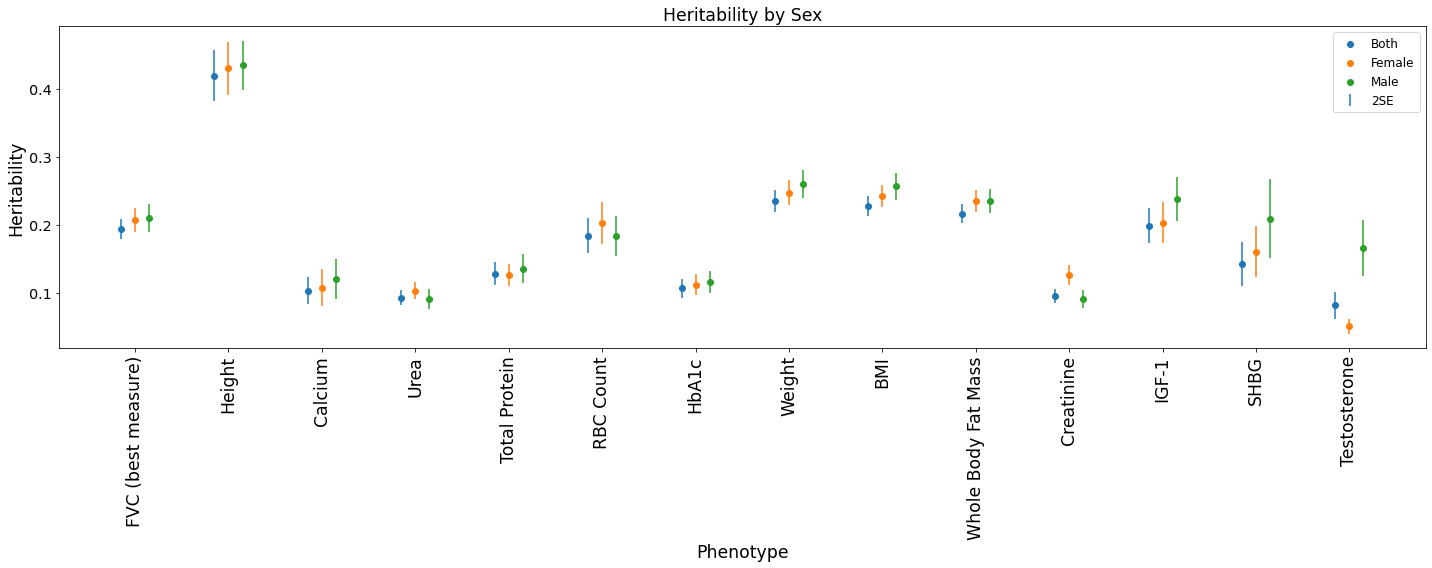

In [243]:
fig = plt.figure(figsize=(20,8))
plt.scatter(x-0.15,y1, label="Both")
plt.scatter(x,y2, label="Female")
plt.scatter(x+0.15,y3, label="Male")
plt.errorbar(x-0.15,y1,yerr=2*e1,linestyle="none",label="2SE")
plt.errorbar(x,y2,yerr=2*e2,linestyle="none")
plt.errorbar(x+0.15,y3,yerr=2*e3,linestyle="none")
plt.xticks(x,df.Phenotype.unique(), rotation = 'vertical', fontsize='xx-large')
plt.yticks(fontsize='x-large')
plt.xlabel("Phenotype", fontsize='xx-large')
plt.ylabel("Heritability", fontsize='xx-large')
plt.legend(fontsize='large')
plt.title("Heritability by Sex", fontsize = 'xx-large')

plt.tight_layout()
plt.savefig("h2_plot_nobili_ordered.png")

#### My and Neale Lab Heritability Comparision

In [ ]:
df_n = pd.read_csv("h2_neale.txt", sep="\t")
df_n.head()
df_n.Neale_h2 = pd.to_numeric(df_n.Neale_h2)
df_n.Neale_SE = pd.to_numeric(df_n.Neale_SE)
y_n = df_n.Neale_h2
e_n = df_n.Neale_SE

In [ ]:
fig = plt.figure(figsize=(20,16))
plt.scatter(x-0.15,y1, label="My LDSC")
plt.scatter(x[0:14],y_n,label="Neale Lab")
plt.xticks(x,df.Phenotype.unique(), rotation = 'vertical', fontsize='x-large')
plt.errorbar(x-0.15,y1,yerr=2*e1,linestyle="none",label="2SE")
plt.errorbar(x[0:14],y_n,yerr=2*e_n,linestyle="none")
plt.yticks(fontsize='x-large')
plt.xlabel("Phenotype", fontsize='x-large')
plt.ylabel("Heritability", fontsize='x-large')
plt.legend(fontsize='large')
plt.title("Neale Lab and My LDSC Heritability Comparision", fontsize = 'xx-large')

#plt.tight_layout()
#plt.savefig("h2_neale.png")

#### Relative Heritability Ordered by Genetic Correlation

In [244]:
df_corr = df.sort_values('Correlation', ascending=False).reset_index(drop=True)
df_corr.head()
relative = []
relative_se = []
for i, row in df_corr.iterrows():
    pheno = row.Phenotype
    both_h2 = df_corr.loc[(df_corr.Phenotype == pheno) & (df_corr.Sex == 'Both'), ['Heritability']].squeeze()
    h2 = row.Heritability / both_h2
    se = ((row.Heritability + row['H2 SE']) / both_h2) - h2
    relative.append(h2)
    relative_se.append(se)
df_corr['Relative'] = relative
df_corr['Relative_SE'] = relative_se

y4 = df_corr.Relative.where(df_corr.Sex == 'Both').dropna()
y5 = df_corr.Relative.where(df_corr.Sex == 'Female').dropna()
y6 = df_corr.Relative.where(df_corr.Sex == 'Male').dropna()
e4 = df_corr['Relative_SE'].where(df_corr.Sex == 'Both').dropna()
e5 = df_corr['Relative_SE'].where(df_corr.Sex == 'Female').dropna()
e6 = df_corr['Relative_SE'].where(df_corr.Sex == 'Male').dropna()

print(df_corr[df_corr.Phenotype == 'Calcium'])
df[df.Phenotype == 'Calcium']

  Phenotype     Sex  Heritability   H2 SE  Correlation  Relative  Relative_SE
6   Calcium    Male        0.1203  0.0150       0.9668  1.166828     0.145490
7   Calcium  Female        0.1074  0.0137       0.9668  1.041707     0.132881
8   Calcium    Both        0.1031  0.0097       0.9668  1.000000     0.094083


,Phenotype,Sex,Heritability,H2 SE,Correlation
6,Calcium,Male,0.1203,0.0150,0.9668
7,Calcium,Female,0.1074,0.0137,0.9668
8,Calcium,Both,0.1031,0.0097,0.9668


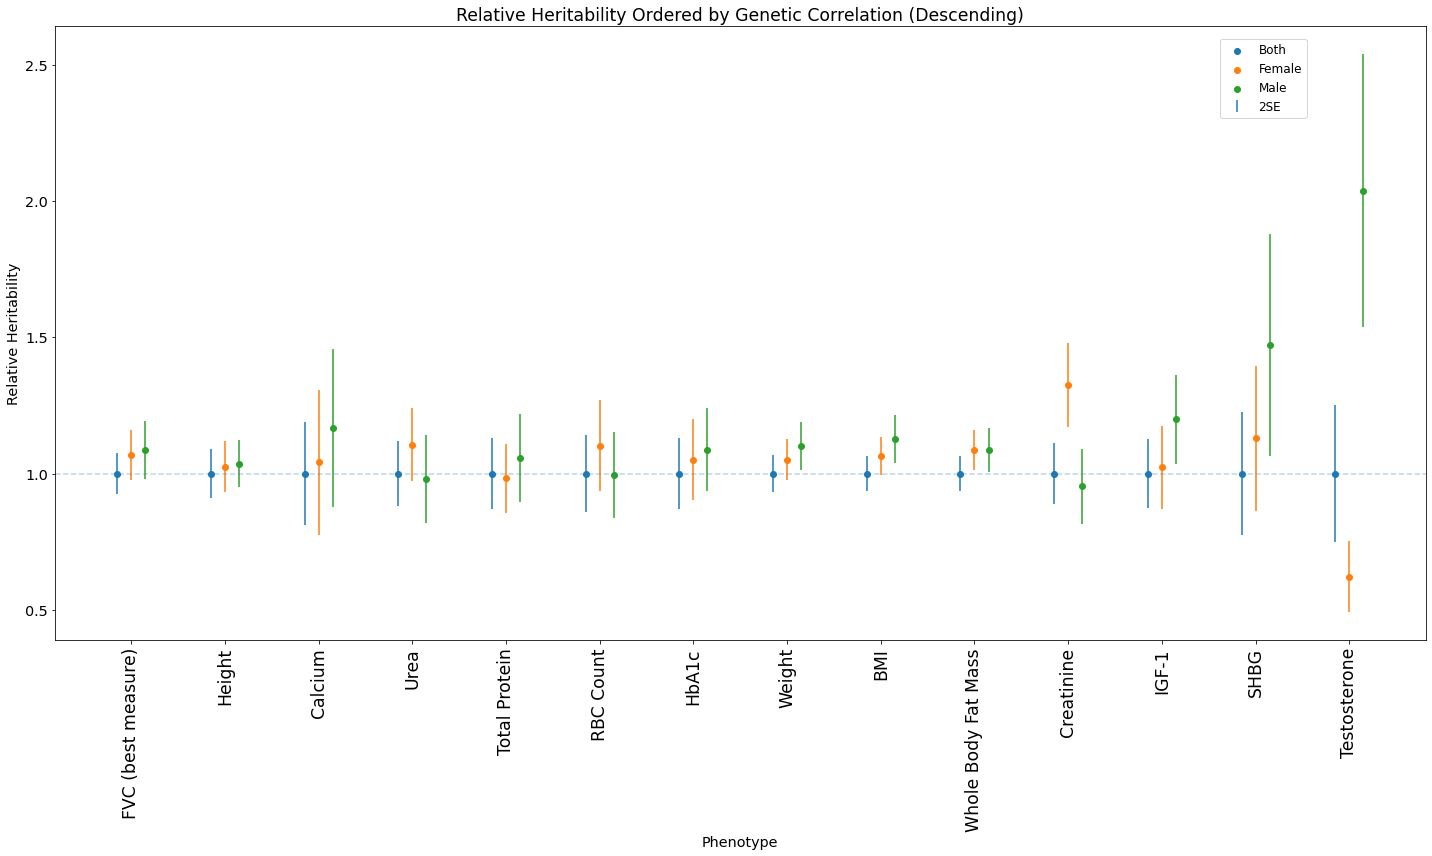

In [247]:
fig = plt.figure(figsize=(20,12))
plt.scatter(x-0.15,y4, label="Both")
plt.scatter(x,y5, label="Female")
plt.scatter(x+0.15,y6, label="Male")
plt.errorbar(x-0.15,y4,yerr=2*e4,linestyle="none",label="2SE")
plt.errorbar(x,y5,yerr=2*e5,linestyle="none")
plt.errorbar(x+0.15,y6,yerr=2*e6,linestyle="none")
plt.xticks(x,df_corr.Phenotype.unique(), rotation = 'vertical', fontsize='xx-large')
plt.yticks(fontsize='x-large')
plt.xlabel("Phenotype", fontsize='x-large')
plt.ylabel("Relative Heritability", fontsize='x-large')
plt.axhline(y=1,linestyle='dashed',alpha=0.3)
plt.legend(fontsize='large', loc=(0.85,0.85))
plt.title("Relative Heritability Ordered by Genetic Correlation (Descending)", fontsize = 'xx-large')

plt.tight_layout()
plt.savefig("relative_h2_nobili.png")

## Mixture Proportion Plot

In [11]:
pheno = "height"

In [12]:
os.chdir('C:\\Users\\Carrie Zhu\\Documents\\Research\\GWAS-frontera\\GWAS_Results\\{0}'.format(pheno))
df = pd.read_csv("{0}mixprop.txt".format(pheno),sep="\t")
df.head()
df_ave = df.mean(axis=1)
df_std = df.std(axis=1)

In [ ]:
fig = plt.figure(figsize=(18,8))

x = np.arange(0,len(df.mix_0.unique()))
for i in range(1,10):
    plt.scatter(x,df["mix_{0}".format(i)], color="purple", s=10, alpha = 0.5)
plt.bar(x,df_ave, alpha=1, color="None", edgecolor="royalblue")
plt.errorbar(x,df_ave,yerr=df_std,linestyle="none",label="stdev", color="royalblue",alpha= 0.5,elinewidth=1)

plt.xticks(x, df.mix_0.unique(), rotation = 'vertical', fontsize='xx-large')
plt.yticks(fontsize='x-large')
plt.xlabel('Variance-Covariance Matrice', fontsize='x-large')
plt.ylabel('Proportion', fontsize='x-large')
plt.legend()
plt.title('Mixture Proportions for Different Covariance Matrices - {0}'.format(pheno), fontsize="xx-large")

#plt.tight_layout()
#plt.savefig("{0}mixpropbar.png".format(pheno))

### Heatmap

In [95]:
# load in mixture proportion results as dataframe
pheno = "RBC_count"
os.chdir('C:\\Users\\Carrie Zhu\\Documents\\Research\\GWAS-frontera\\GWAS_Results\\{0}'.format(pheno))
df = pd.read_csv("{0}mixprop_full.txt".format(pheno),sep="\t")

In [96]:
# get mean and std dev; split matrice name into correlation and effect categories
df_values = pd.DataFrame({'std':df.std(axis=1),'ave':df.mean(axis=1)})
df = pd.concat([df['mix_0'], df_values['ave'], df_values['std']], axis=1)
split_df = df["mix_0"].str.split("_", n=2, expand = True)
df['corr'] = split_df[1].astype(float)
df['effect'] = split_df[0] + split_df[2]

In [97]:
# create pivot table to hypothesis and null matrices for averages and std
df_hyp = df.loc[pd.notnull(df['effect'])]
df_ave = df_hyp.pivot(index='corr',columns='effect',values='ave')
df_ave = df_ave.reindex(columns=['f1','f3', 'f2', 'f1.5','equal1','m1.5','m2','m3','m1'])
df_ave = df_ave.sort_values('corr', ascending=False)

df_std = df_hyp.pivot(index='corr',columns='effect',values='std')
df_std = df_std.reindex(columns=['f1','f3', 'f2', 'f1.5','equal1','m1.5','m2','m3','m1'])
df_std = df_std.sort_values('corr', ascending=False)

df_null = df.loc[pd.isnull(df['effect'])]
df_null_ave = pd.DataFrame(list(df_null['ave']), index=list(df_null['mix_0']), columns=['Average']).T
df_null_std = pd.DataFrame(list(df_null['std']), index=list(df_null['mix_0']), columns=['STD']).T

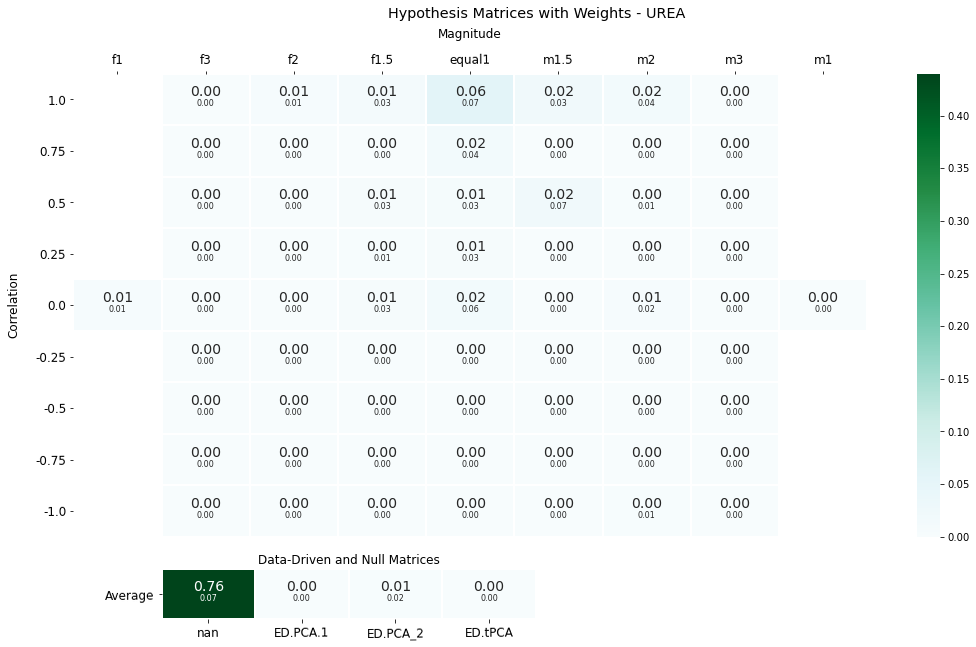

In [65]:
# plot heat map
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(8, 12)
ax1 = fig.add_subplot(gs[0:6,:])
ax2 = fig.add_subplot(gs[6:7,1:6])

plt.suptitle("Hypothesis Matrices with Weights - {0}".format(pheno.upper()), fontsize='x-large')
sns.heatmap(df_ave, cmap='BuGn', annot=True, annot_kws={'size':14, 'va':'bottom'}, linewidths=1, ax=ax1, vmax=0.44, fmt='.2f')
sns.heatmap(df_ave, cmap='BuGn', annot=df_std, annot_kws={'size':8, 'va':'top'}, linewidths=1, ax=ax1, vmax=0.44, fmt='.2f',cbar=False)

ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.set_xlabel('Magnitude',fontsize='large', labelpad=15)
ax1.set_ylabel('Correlation', fontsize='large', labelpad=15)
ax1.tick_params(labelsize=12, labelrotation=0.5)

ax2.set_title("Data-Driven and Null Matrices")
sns.heatmap(df_null_ave, cmap='BuGn', annot=True, annot_kws={'size':14, 'va':'bottom'}, linewidths=1, ax=ax2, cbar=False, fmt='.2f')
sns.heatmap(df_null_ave, cmap='BuGn', annot=df_null_std, annot_kws={'size':8, 'va':'top'}, linewidths=1, ax=ax2, cbar=False, fmt='.2f')
ax2.tick_params(labelsize=12, labelrotation=0.5)

plt.tick_params(labelsize=12)

plt.tight_layout()
#plt.savefig("{0}mixheat_all_12.png".format(pheno))

#### Simplified Heat Map

In [98]:
# create simplied table, proportion based on non-null
nan_weight = 1 / (1 - df_null.iloc[0]['ave'])
df_s = df_ave * nan_weight
f = df_s.filter(regex='f').sum(axis=1)
equal = df_s.filter(regex='equal').sum(axis=1)
m = df_s.filter(regex='m').sum(axis=1)
df_s = pd.DataFrame([f,equal,m], index=['F > M','F = M','F < M']).T
perfect = df_s.loc[df_s.index.astype(float) == 1].sum()
partial = df_s.loc[(df_s.index.astype(float) > 0) & (df_ave.index.astype(float) < 1)].sum()
uncorrelated = df_s.loc[df_s.index.astype(float) == 0].sum()
negative = df_s.loc[df_s.index.astype(float) < 0].sum()
df_s = pd.DataFrame([perfect,partial,uncorrelated,negative], index=['perfect','partial','uncorrelated','negative'])

gender_sum = ['%.0f' % i for i in 100*round(df_s.sum(),2)]
gender_sum = pd.DataFrame(gender_sum).T
corr_sum = ['%.0f' % i for i in 100*round(df_s.sum(axis=1),2)]
corr_sum = pd.DataFrame(corr_sum)
print(df_s)

                 F > M     F = M     F < M
perfect       0.205524  0.162433  0.215307
partial       0.088518  0.215013  0.094462
uncorrelated  0.000000  0.000000  0.015490
negative      0.000000  0.003252  0.000000


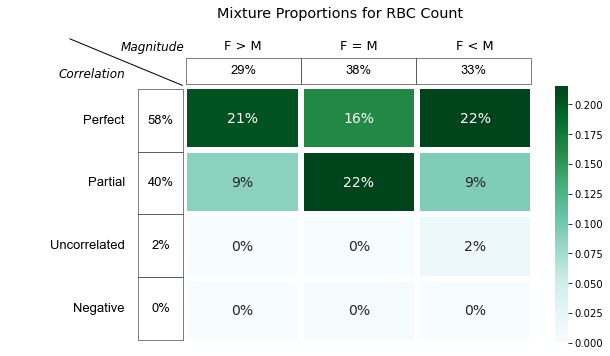

In [99]:
# create simplified heat map with totals table 
fig, ax = plt.subplots(figsize=(9, 5))
sns.heatmap(df_s, cmap='BuGn', annot=True, annot_kws={'size':14}, linewidths=5, fmt='.0%', xticklabels=True, yticklabels=False)

ax.xaxis.tick_top()
ax.tick_params(axis='x', top=False, pad=30, labelsize='13')
ax.xaxis.set_label_position('top')
#ax.set_xlabel('Magnitude',fontsize='18', labelpad=20)
#ax.set_ylabel('Correlation', fontsize='18', labelpad=25)
#ax.tick_params(labelsize=15, labelrotation=0.5)

tbl1 = ax.table(cellText=gender_sum.values+'%', cellLoc='center',
                bbox=[0.005,1.01,0.99,.1])
tbl2 = ax.table(cellText=corr_sum.values+'%', rowLabels=['Perfect','Partial','Uncorrelated','Negative'], rowLoc='right',
                cellLoc='center', bbox=[-0.25,0.01,.13,0.98])
tbl1.auto_set_font_size(False)
tbl2.auto_set_font_size(False)
tbl2.auto_set_column_width(False)
for i in range(4):
    tbl2.get_celld()[(i,0)].set_text_props(fontfamily='Arial', fontsize='13')
    tbl2.get_celld()[(i,0)].set_linewidth(0.5)
    tbl2.get_celld()[(i,-1)].set_text_props(fontfamily='Arial', fontsize='13')
    tbl2.get_celld()[(i,-1)].visible_edges = ''
for c in tbl1.get_celld().values():
    c.set_text_props(fontfamily='Arial', fontsize='13')
    c.set_linewidth(0.5)
ax.text(-1.08,-0.13,'Correlation',fontdict={'size':'large', 'style':'italic'})
ax.text(-0.55,-0.55,'Magnitude',fontdict={'size':'large', 'style':'italic'})
plt.suptitle("Mixture Proportions for {0}".format("RBC Count"), fontsize='x-large', x=0.55)
plt.annotate("",xy=(0,0),xytext=(-1,-0.75),color='black', arrowprops={'arrowstyle':'-'})

plt.tight_layout()
plt.savefig("{0}mixheat_small.png".format(pheno))

#### M/F Weights by Phenotypic Variance

In [15]:
os.chdir('C:\\Users\\Carrie Zhu\\Documents\\Research\\GWAS-frontera\\Phenotypes')
df_vars = pd.read_csv("pheno_variances_bysex.txt", sep="\t")
os.chdir('C:\\Users\\Carrie Zhu\\Documents\\Research\\GWAS-frontera\\GWAS_Results')
df_weights = pd.read_csv("sum_weight_m.txt", sep="\t")

In [7]:
df_vars.sort_values('pheno', inplace=True)
df_weights.sort_values('phenotype', inplace=True)
df_vars
df_vars['ratio_m/f'] = df_vars['m_var'] / df_vars['f_var']
df_weights['diff_m-f'] = df_weights['sum_weight_m'] - df_weights['sum_weight_f']

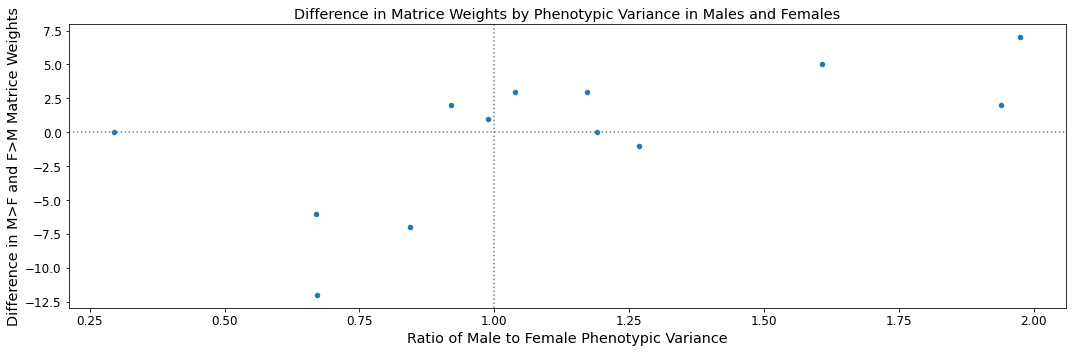

In [12]:
fig = plt.figure(figsize=(15, 5))
x=df_vars['ratio_m/f']
y=df_weights['diff_m-f']
plt.scatter(x=x, y=y, s=20)
plt.axvline(1, ls=":",c="gray")
plt.axhline(ls=":",c="gray")
#plt.ylim(-12.5,12.5)
plt.xlabel("Ratio of Male to Female Phenotypic Variance", fontsize='x-large')
plt.ylabel("Difference in M>F and F>M Matrice Weights", fontsize='x-large')
plt.tick_params(labelsize=12)
plt.title("Difference in Matrice Weights by Phenotypic Variance in Males and Females", fontsize="x-large")

plt.tight_layout()
#plt.savefig("phenovar_matweights.png")

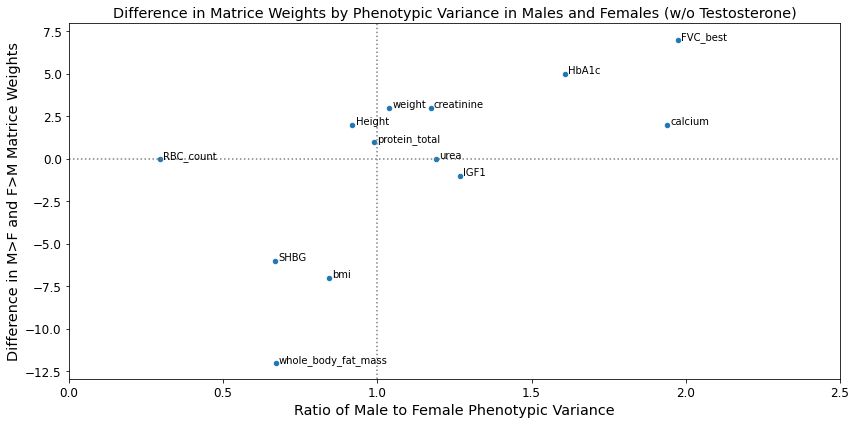

In [13]:
fig = plt.figure(figsize=(12, 6))

df_vars = df_vars.loc[df_vars['pheno'] != 'testosterone']
df_weights = df_weights.loc[df_weights['phenotype'] != 'testosterone']
x=df_vars['ratio_m/f']
y=df_weights['diff_m-f']

plt.scatter(x=x, y=y, s=20)
plt.axvline(1, ls=":",c="gray")
plt.axhline(ls=":",c="gray")
#plt.ylim(-12.5,12.5)
plt.xlim(0,2.5)
plt.xlabel("Ratio of Male to Female Phenotypic Variance", fontsize='x-large')
plt.ylabel("Difference in M>F and F>M Matrice Weights", fontsize='x-large')
plt.tick_params(labelsize=12)
plt.title("Difference in Matrice Weights by Phenotypic Variance in Males and Females (w/o Testosterone)", fontsize="x-large")

for i in range(len(x)):
    plt.annotate(list(df_weights['phenotype'])[i], xy= (list(x)[i],list(y)[i]), 
                 xytext=(list(x)[i]+0.01,list(y)[i]+0.02), c='black')

plt.tight_layout()
#plt.savefig("phenovar_matweights_zoom_anno.png")